In [55]:
import pandas as pd

In [56]:
raw_data = pd.read_csv('scout_obleka_mazhi.csv')
raw_data

,Name,SKU,Original Price,Discount Price,Description,Image URL,Sizes,Colors,URL
0,1960 Logo T-shirt F87313,1960 Logo T-shirt F87313,"3,090.00ден",NaN,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,"['m', 's']","['green', 'green']",https://www.scout.mk/product/1960-logo-t-shirt...
1,Abisko Hike Shirt LS F82263,Abisko Hike Shirt LS F82263,NaN,NaN,Лесна трекинг кошула со долги ракави изработен...,https://www.scout.mk/wp-content/uploads/2024/0...,[],[],https://www.scout.mk/product/abisko-hike-shirt...
2,Abisko Lite Fleece Half Zip F87113,Abisko Lite Fleece Half Zip F87113,"6,790.00ден",NaN,Лесен и удобен флис со полупатент.,https://www.scout.mk/wp-content/uploads/2024/0...,"['l', 'm', 'm', 'm', 's', 'xl']","['green', 'green', 'navy', 'orange', 'orange',...",https://www.scout.mk/product/abisko-lite-fleec...
3,Abisko Lite Fleece Jacket F86971,Abisko Lite Fleece Jacket F86971,"9,290.00ден",NaN,"Лесен флис што се пакува, совршен за еднодневн...",https://www.scout.mk/wp-content/uploads/2024/0...,"['l', 'm', 'xl', 'xl']","['green', 'green', 'navy', 'navy']",https://www.scout.mk/product/abisko-lite-fleec...
4,Abisko Lite Trekking Trousers F82890R,Abisko Lite Trekking Trousers F82890R,"12,390.00ден",NaN,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,['56'],['grey'],https://www.scout.mk/product/abisko-lite-trekk...
...,...,...,...,...,...,...,...,...,...
246,VONNAN GRAPHIC T M,VONNAN GRAPHIC T M,"2,790.00ден",NaN,Машка памучна маица,https://www.scout.mk/wp-content/uploads/2025/0...,"['2xl', 'l', 'l', 'm', 'm', 's', 'xl']","['orange', 'orange', 'orange', 'sky', 'sky', '...",https://www.scout.mk/product/vonnan-graphic-t-m/
247,WINTERLAGER PARKA M,Winterlager Parka M 1115471,"13,490.00ден","13,490.00ден",Парка\nВодоотпорна и ветероотпорна\nВодоотпорн...,https://www.scout.mk/wp-content/uploads/2022/1...,"['l', 'xl']","['green', 'green']",https://www.scout.mk/product/winterlager-parka...
248,WISPER INS JKT M,WISPER INS JKT M,"14,790.00ден","14,790.00ден",Машка спортска јакна хард шел,https://www.scout.mk/wp-content/uploads/2025/0...,"['s', 'xl']","['navy', 'navy']",https://www.scout.mk/product/wisper-ins-jkt-m/
249,YONDER II,YonderII M RMA606,"3,090.00ден",NaN,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,"['l', 'l', 'l', 'm', 'm', 'xl', 'xl', 'xxl', '...","['grey', 'grey', 'grey', 'grey', 'olive', 'oli...",https://www.scout.mk/product/yonderii-m-rma606/


In [57]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price     69
Discount Price    164
Description         8
Image URL           0
Sizes               0
Colors              0
URL                 0
dtype: int64

In [58]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price     69
Discount Price    164
Description         8
Image URL           0
Sizes               0
Colors              0
URL                 0
dtype: int64

In [59]:
# Drop any row that’s missing either price
# df_drop = raw_data.dropna(subset=['Original Price','Discount Price'])

In [60]:

def clean_price(col):
    return (
        col
        .str.replace(r'[^\d.,]', '', regex=True)   # remove non-digits except dot/comma
        .str.replace(',', '', regex=False)         # remove thousands separator
        .astype(float)
    )

# 2.2 Apply it
raw_data['orig_price'] = clean_price(raw_data['Original Price'])
raw_data['discount_price'] = clean_price(raw_data['Discount Price'])

# 2.3 (Optional) flag “has_discount”
raw_data['has_discount'] = raw_data['discount_price'].notna()


In [61]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price     69
Discount Price    164
Description         8
Image URL           0
Sizes               0
Colors              0
URL                 0
orig_price         69
discount_price    164
has_discount        0
dtype: int64

In [62]:
raw_data['discount_price'] = raw_data['discount_price'].fillna(raw_data['orig_price'])

In [63]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price     69
Discount Price    164
Description         8
Image URL           0
Sizes               0
Colors              0
URL                 0
orig_price         69
discount_price     69
has_discount        0
dtype: int64

In [64]:
raw_data = raw_data.dropna(subset=['orig_price'])

In [65]:
raw_data.isnull().sum()

Name               0
SKU                0
Original Price     0
Discount Price    95
Description        5
Image URL          0
Sizes              0
Colors             0
URL                0
orig_price         0
discount_price     0
has_discount       0
dtype: int64

In [66]:
# completely drop the un-needed original price columns
raw_data = raw_data.drop(columns=['Discount Price'])

In [67]:
raw_data.isnull().sum()

Name              0
SKU               0
Original Price    0
Description       5
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [68]:
raw_data = raw_data.drop(columns=['Original Price'])

In [69]:
raw_data.isnull().sum()

Name              0
SKU               0
Description       5
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [70]:
raw_data = raw_data.dropna(subset=['Description'])

In [71]:
raw_data.isnull().sum()

Name              0
SKU               0
Description       0
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [72]:
import ast

# 4.1 Convert the string-literal to real Python list
raw_data['sizes_list'] = raw_data['Sizes'] \
    .apply(lambda s: ast.literal_eval(s) if pd.notna(s) else [])

raw_data['colors_list'] = raw_data['Colors'] \
    .apply(lambda s: ast.literal_eval(s) if pd.notna(s) else [])

# 4.2 Remove duplicates within each list
raw_data['sizes_list'] = raw_data['sizes_list'].apply(lambda L: sorted(set(L)))
raw_data['colors_list'] = raw_data['colors_list'].apply(lambda L: sorted(set(L)))


In [73]:
# 7.2 Trim whitespace & normalize case
for col in ['Name', 'SKU', 'Description']:
    raw_data[col] = raw_data[col].str.strip()

In [74]:
raw_data.drop('SKU', axis=1, inplace=True)

In [75]:
raw_data.head(1)

,Name,Description,Image URL,Sizes,Colors,URL,orig_price,discount_price,has_discount,sizes_list,colors_list
0,1960 Logo T-shirt F87313,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,"['m', 's']","['green', 'green']",https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,False,"[m, s]",[green]


In [76]:
raw_data.drop('Sizes', axis=1, inplace=True)
raw_data.drop('Colors', axis=1, inplace=True)

In [77]:
cleaned_data = raw_data.rename(columns={
    'Name'            : 'Име',
    'orig_price'  : 'Цена',
    'discount_price'  : 'Намалена цена',
    'Description'     : 'Опис',
    'Image URL'       : 'Линк до слика на продукт',
    'sizes_list'      : 'Достапни величини',      # or just 'sizes'
    'colors_list'     : 'Достапни бои',     # or just 'colors'
    'URL'             : 'Линк до продукт',
    'has_discount'    : 'Достапен попуст'
}, inplace=False) 

In [78]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапен попуст,Достапни величини,Достапни бои
0,1960 Logo T-shirt F87313,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,False,"[m, s]",[green]
2,Abisko Lite Fleece Half Zip F87113,Лесен и удобен флис со полупатент.,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,6790.0,6790.0,False,"[l, m, s, xl]","[green, navy, orange]"
3,Abisko Lite Fleece Jacket F86971,"Лесен флис што се пакува, совршен за еднодневн...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,False,"[l, m, xl]","[green, navy]"
4,Abisko Lite Trekking Trousers F82890R,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,12390.0,12390.0,False,[56],[grey]
5,Abisko Lite Trekking Zip-off F81535,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,13690.0,13690.0,False,"[50, 52, 54]",[navy]
...,...,...,...,...,...,...,...,...,...
245,Vertigo Headband 1906032,Многу лесна трака направена од рециклирана тка...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/vertigo-headband-...,1190.0,1190.0,True,[],"[black, navy]"
246,VONNAN GRAPHIC T M,Машка памучна маица,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/vonnan-graphic-t-m/,2790.0,2790.0,False,"[2xl, l, m, s, xl]","[orange, sky]"
247,WINTERLAGER PARKA M,Парка\nВодоотпорна и ветероотпорна\nВодоотпорн...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/winterlager-parka...,13490.0,13490.0,True,"[l, xl]",[green]
248,WISPER INS JKT M,Машка спортска јакна хард шел,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/wisper-ins-jkt-m/,14790.0,14790.0,True,"[s, xl]",[navy]


In [79]:
cleaned_data.isnull().sum()

Име                         0
Опис                        0
Линк до слика на продукт    0
Линк до продукт             0
Цена                        0
Намалена цена               0
Достапен попуст             0
Достапни величини           0
Достапни бои                0
dtype: int64

In [80]:
cleaned_data.drop('Достапен попуст', axis=1, inplace=True)

In [81]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапни величини,Достапни бои
0,1960 Logo T-shirt F87313,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,"[m, s]",[green]
2,Abisko Lite Fleece Half Zip F87113,Лесен и удобен флис со полупатент.,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,6790.0,6790.0,"[l, m, s, xl]","[green, navy, orange]"
3,Abisko Lite Fleece Jacket F86971,"Лесен флис што се пакува, совршен за еднодневн...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,"[l, m, xl]","[green, navy]"
4,Abisko Lite Trekking Trousers F82890R,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,12390.0,12390.0,[56],[grey]
5,Abisko Lite Trekking Zip-off F81535,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,13690.0,13690.0,"[50, 52, 54]",[navy]
...,...,...,...,...,...,...,...,...
245,Vertigo Headband 1906032,Многу лесна трака направена од рециклирана тка...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/vertigo-headband-...,1190.0,1190.0,[],"[black, navy]"
246,VONNAN GRAPHIC T M,Машка памучна маица,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/vonnan-graphic-t-m/,2790.0,2790.0,"[2xl, l, m, s, xl]","[orange, sky]"
247,WINTERLAGER PARKA M,Парка\nВодоотпорна и ветероотпорна\nВодоотпорн...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/winterlager-parka...,13490.0,13490.0,"[l, xl]",[green]
248,WISPER INS JKT M,Машка спортска јакна хард шел,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/wisper-ins-jkt-m/,14790.0,14790.0,"[s, xl]",[navy]


In [82]:
# Add a new column named "Валута" with every row = "МКД"
cleaned_data['Валута'] = 'МКД'

In [83]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапни величини,Достапни бои,Валута
0,1960 Logo T-shirt F87313,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,"[m, s]",[green],МКД
2,Abisko Lite Fleece Half Zip F87113,Лесен и удобен флис со полупатент.,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,6790.0,6790.0,"[l, m, s, xl]","[green, navy, orange]",МКД
3,Abisko Lite Fleece Jacket F86971,"Лесен флис што се пакува, совршен за еднодневн...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,"[l, m, xl]","[green, navy]",МКД
4,Abisko Lite Trekking Trousers F82890R,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,12390.0,12390.0,[56],[grey],МКД
5,Abisko Lite Trekking Zip-off F81535,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,13690.0,13690.0,"[50, 52, 54]",[navy],МКД
...,...,...,...,...,...,...,...,...,...
245,Vertigo Headband 1906032,Многу лесна трака направена од рециклирана тка...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/vertigo-headband-...,1190.0,1190.0,[],"[black, navy]",МКД
246,VONNAN GRAPHIC T M,Машка памучна маица,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/vonnan-graphic-t-m/,2790.0,2790.0,"[2xl, l, m, s, xl]","[orange, sky]",МКД
247,WINTERLAGER PARKA M,Парка\nВодоотпорна и ветероотпорна\nВодоотпорн...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/winterlager-parka...,13490.0,13490.0,"[l, xl]",[green],МКД
248,WISPER INS JKT M,Машка спортска јакна хард шел,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/wisper-ins-jkt-m/,14790.0,14790.0,"[s, xl]",[navy],МКД


In [84]:
cols = cleaned_data.columns.tolist()
cols

['Име',
 'Опис',
 'Линк до слика на продукт',
 'Линк до продукт',
 'Цена',
 'Намалена цена',
 'Достапни величини',
 'Достапни бои',
 'Валута']

In [85]:
cols.remove('Валута')

In [86]:
pos = cols.index('Намалена цена') + 1

In [87]:
cols.insert(pos, 'Валута')

In [88]:
cleaned_data = cleaned_data[cols]

In [89]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,1960 Logo T-shirt F87313,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,МКД,"[m, s]",[green]
2,Abisko Lite Fleece Half Zip F87113,Лесен и удобен флис со полупатент.,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,6790.0,6790.0,МКД,"[l, m, s, xl]","[green, navy, orange]"
3,Abisko Lite Fleece Jacket F86971,"Лесен флис што се пакува, совршен за еднодневн...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,МКД,"[l, m, xl]","[green, navy]"
4,Abisko Lite Trekking Trousers F82890R,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,12390.0,12390.0,МКД,[56],[grey]
5,Abisko Lite Trekking Zip-off F81535,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,13690.0,13690.0,МКД,"[50, 52, 54]",[navy]
...,...,...,...,...,...,...,...,...,...
245,Vertigo Headband 1906032,Многу лесна трака направена од рециклирана тка...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/vertigo-headband-...,1190.0,1190.0,МКД,[],"[black, navy]"
246,VONNAN GRAPHIC T M,Машка памучна маица,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/vonnan-graphic-t-m/,2790.0,2790.0,МКД,"[2xl, l, m, s, xl]","[orange, sky]"
247,WINTERLAGER PARKA M,Парка\nВодоотпорна и ветероотпорна\nВодоотпорн...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/winterlager-parka...,13490.0,13490.0,МКД,"[l, xl]",[green]
248,WISPER INS JKT M,Машка спортска јакна хард шел,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/wisper-ins-jkt-m/,14790.0,14790.0,МКД,"[s, xl]",[navy]


In [90]:
# if there are **no** NaNs in 'Намалена цена'
cleaned_data['Намалена цена'] = cleaned_data['Намалена цена'].astype(int)
cleaned_data['Цена'] = cleaned_data['Цена'].astype(int)

In [91]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,1960 Logo T-shirt F87313,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090,3090,МКД,"[m, s]",[green]
2,Abisko Lite Fleece Half Zip F87113,Лесен и удобен флис со полупатент.,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,6790,6790,МКД,"[l, m, s, xl]","[green, navy, orange]"
3,Abisko Lite Fleece Jacket F86971,"Лесен флис што се пакува, совршен за еднодневн...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290,9290,МКД,"[l, m, xl]","[green, navy]"
4,Abisko Lite Trekking Trousers F82890R,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,12390,12390,МКД,[56],[grey]
5,Abisko Lite Trekking Zip-off F81535,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,13690,13690,МКД,"[50, 52, 54]",[navy]
...,...,...,...,...,...,...,...,...,...
245,Vertigo Headband 1906032,Многу лесна трака направена од рециклирана тка...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/vertigo-headband-...,1190,1190,МКД,[],"[black, navy]"
246,VONNAN GRAPHIC T M,Машка памучна маица,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/vonnan-graphic-t-m/,2790,2790,МКД,"[2xl, l, m, s, xl]","[orange, sky]"
247,WINTERLAGER PARKA M,Парка\nВодоотпорна и ветероотпорна\nВодоотпорн...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/winterlager-parka...,13490,13490,МКД,"[l, xl]",[green]
248,WISPER INS JKT M,Машка спортска јакна хард шел,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/wisper-ins-jkt-m/,14790,14790,МКД,"[s, xl]",[navy]


In [92]:
cleaned_data.to_csv('scout_obleka_mazhi_cleaned.csv', index=False)

In [93]:
cleaned_data_csv = pd.read_csv('scout_obleka_mazhi_cleaned.csv')
cleaned_data_csv

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,1960 Logo T-shirt F87313,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090,3090,МКД,"['m', 's']",['green']
1,Abisko Lite Fleece Half Zip F87113,Лесен и удобен флис со полупатент.,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,6790,6790,МКД,"['l', 'm', 's', 'xl']","['green', 'navy', 'orange']"
2,Abisko Lite Fleece Jacket F86971,"Лесен флис што се пакува, совршен за еднодневн...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290,9290,МКД,"['l', 'm', 'xl']","['green', 'navy']"
3,Abisko Lite Trekking Trousers F82890R,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,12390,12390,МКД,['56'],['grey']
4,Abisko Lite Trekking Zip-off F81535,"Лесни, дишливи панталони со патент од растегли...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-trekk...,13690,13690,МКД,"['50', '52', '54']",['navy']
...,...,...,...,...,...,...,...,...,...
172,Vertigo Headband 1906032,Многу лесна трака направена од рециклирана тка...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/vertigo-headband-...,1190,1190,МКД,[],"['black', 'navy']"
173,VONNAN GRAPHIC T M,Машка памучна маица,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/vonnan-graphic-t-m/,2790,2790,МКД,"['2xl', 'l', 'm', 's', 'xl']","['orange', 'sky']"
174,WINTERLAGER PARKA M,Парка\nВодоотпорна и ветероотпорна\nВодоотпорн...,https://www.scout.mk/wp-content/uploads/2022/1...,https://www.scout.mk/product/winterlager-parka...,13490,13490,МКД,"['l', 'xl']",['green']
175,WISPER INS JKT M,Машка спортска јакна хард шел,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/wisper-ins-jkt-m/,14790,14790,МКД,"['s', 'xl']",['navy']


In [94]:
import pandas as pd
import ast, json

In [95]:
stand_data = pd.read_csv('scout_obleka_mazhi_cleaned.csv')

In [96]:
print("COLUMNS:", stand_data.columns.tolist())

COLUMNS: ['Име', 'Опис', 'Линк до слика на продукт', 'Линк до продукт', 'Цена', 'Намалена цена', 'Валута', 'Достапни величини', 'Достапни бои']


In [97]:
stand_data['sizes_list'] = stand_data['Достапни величини'].apply(ast.literal_eval)
stand_data['colors_list'] = stand_data['Достапни бои'].apply(ast.literal_eval)

In [98]:
stand_data['std_sizes']  = stand_data['sizes_list'].apply(lambda L: [s.strip().upper() for s in L])
stand_data['std_colors'] = stand_data['colors_list'].apply(lambda L: [c.strip().lower() for c in L])

In [99]:
def make_attributes(row):
    return {
        "опис":            row['Опис'],
        "линк_слика":      row['Линк до слика на продукт'],  # or adjust to 'Линк до слика на продукт'
        "линк_продукт":    row['Линк до продукт'],
        "цена":            row['Цена'],
        "намалена_цена":   row['Намалена цена'],
        "валута":          row['Валута'],
        "величини":        row['std_sizes'],
        "бои":             row['std_colors']
    }

In [100]:
stand_data['attributes']      = stand_data.apply(make_attributes, axis=1)
stand_data['attributes_json'] = stand_data['attributes'].apply(lambda d: json.dumps(d, ensure_ascii=False))

In [101]:
print(stand_data[['Име','attributes_json']].head())

                                     Име  \
0               1960 Logo T-shirt F87313   
1     Abisko Lite Fleece Half Zip F87113   
2       Abisko Lite Fleece Jacket F86971   
3  Abisko Lite Trekking Trousers F82890R   
4    Abisko Lite Trekking Zip-off F81535   

                                     attributes_json  
0  {"опис": "Лесна маичка изработена од органски ...  
1  {"опис": "Лесен и удобен флис со полупатент.",...  
2  {"опис": "Лесен флис што се пакува, совршен за...  
3  {"опис": "Лесни, дишливи панталони со патент о...  
4  {"опис": "Лесни, дишливи панталони со патент о...  


In [102]:
print(stand_data[['Достапни величини','attributes_json']].head())

       Достапни величини                                    attributes_json
0             ['m', 's']  {"опис": "Лесна маичка изработена од органски ...
1  ['l', 'm', 's', 'xl']  {"опис": "Лесен и удобен флис со полупатент.",...
2       ['l', 'm', 'xl']  {"опис": "Лесен флис што се пакува, совршен за...
3                 ['56']  {"опис": "Лесни, дишливи панталони со патент о...
4     ['50', '52', '54']  {"опис": "Лесни, дишливи панталони со патент о...


In [103]:
# stand_data.to_csv('standardized_with_attributes_scout_mazhi.csv', index=False)

In [106]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [107]:
def safe_parse_list(x):
    try:
        # Прво обид со literal_eval
        return ast.literal_eval(x)
    except Exception:
        # Ако не успее, ако е низ стринг сaо запирки, распарси така:
        if isinstance(x, str) and ',' in x:
            return [el.strip() for el in x.split(',') if el.strip()]
        # Ако е празно или нешто друго, врати празен список
        return []

In [108]:
cleaned_data['sizes_list']  = cleaned_data['Достапни величини'].apply(safe_parse_list)
cleaned_data['colors_list'] = cleaned_data['Достапни бои'].apply(safe_parse_list)

# 3. Број на елементи во list колоните
cleaned_data['count_sizes']  = cleaned_data['sizes_list'].apply(len)
cleaned_data['count_colors'] = cleaned_data['colors_list'].apply(len)

# 4. Пресметка на апсолутен попуст (ако веќе не е директно даден)
cleaned_data['discount_abs'] = cleaned_data['Цена'] - cleaned_data['Намалена цена']

# 5. Помошна функција за прикажување
def show():
    plt.tight_layout()
    plt.show()


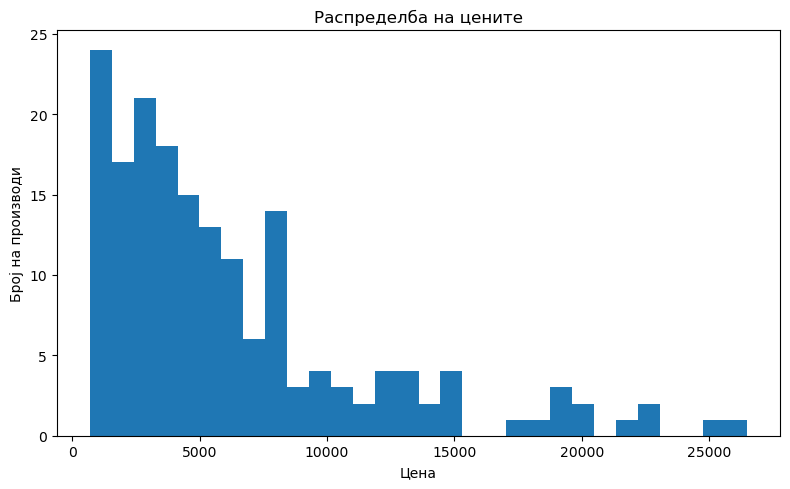

In [109]:
# A. Хистограм на Цена
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['Цена'].dropna(), bins=30)
plt.title('Распределба на цените')
plt.xlabel('Цена')
plt.ylabel('Број на производи')
show()

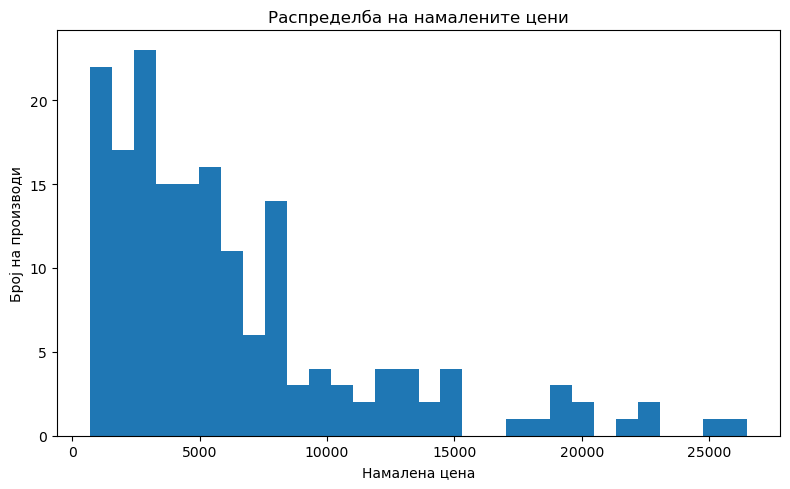

In [110]:
# B. Хистограм на Намалена цена
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['Намалена цена'].dropna(), bins=30)
plt.title('Распределба на намалените цени')
plt.xlabel('Намалена цена')
plt.ylabel('Број на производи')
show()

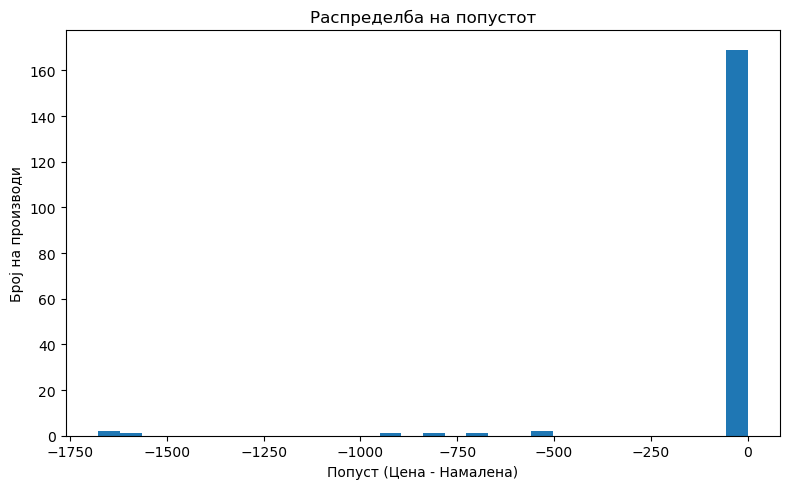

In [111]:
# C. Хистограм на Апсолутен попуст
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['discount_abs'].dropna(), bins=30)
plt.title('Распределба на попустот')
plt.xlabel('Попуст (Цена - Намалена)')
plt.ylabel('Број на производи')
show()

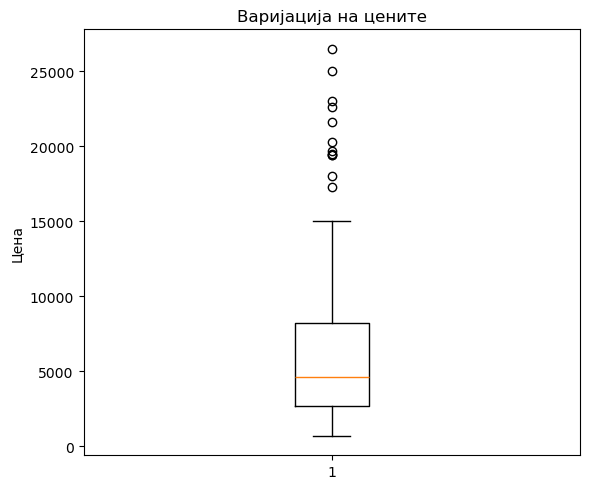

In [112]:
# D. Бокс-плот на Цена
plt.figure(figsize=(6,5))
plt.boxplot(cleaned_data['Цена'].dropna(), vert=True)
plt.title('Варијација на цените')
plt.ylabel('Цена')
show()

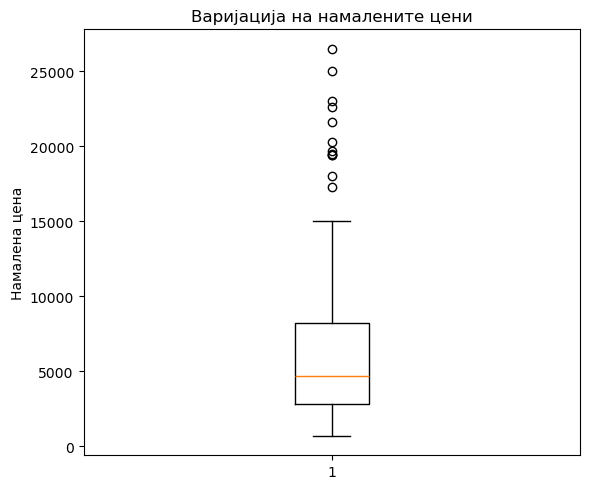

In [113]:
# E. Бокс-плот на Намалена цена
plt.figure(figsize=(6,5))
plt.boxplot(cleaned_data['Намалена цена'].dropna(), vert=True)
plt.title('Варијација на намалените цени')
plt.ylabel('Намалена цена')
show()

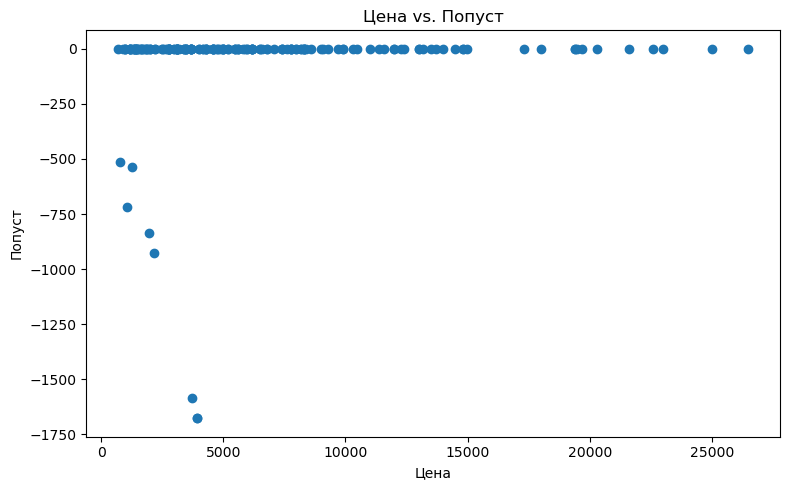

In [114]:
# F. Скатер: Цена vs. Попуст
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['Цена'], cleaned_data['discount_abs'])
plt.title('Цена vs. Попуст')
plt.xlabel('Цена')
plt.ylabel('Попуст')
show()

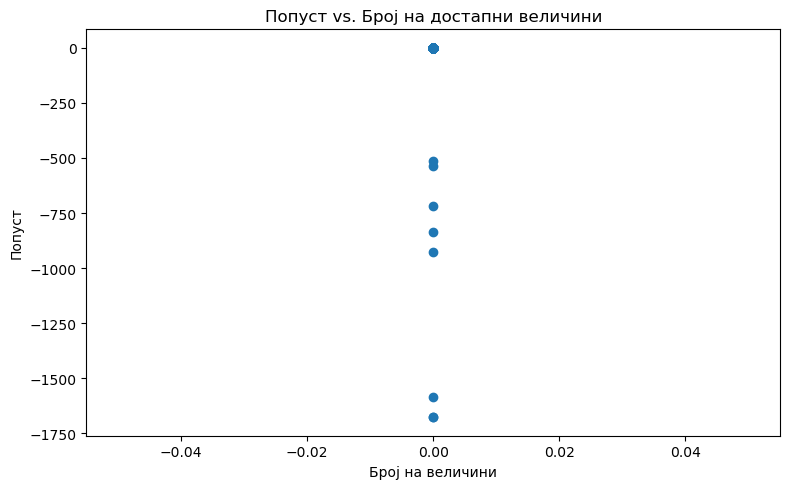

In [115]:
# G. Скатер: Попуст vs. број величини
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['count_sizes'], cleaned_data['discount_abs'])
plt.title('Попуст vs. Број на достапни величини')
plt.xlabel('Број на величини')
plt.ylabel('Попуст')
show()

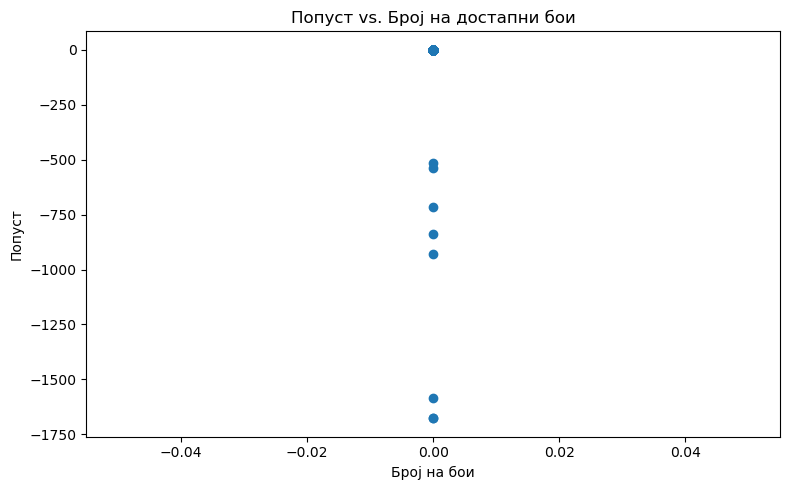

In [117]:
# H. Скатер: Попуст vs. број бои
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['count_colors'], cleaned_data['discount_abs'])
plt.title('Попуст vs. Број на достапни бои')
plt.xlabel('Број на бои')
plt.ylabel('Попуст')
show()